# Total Puzzle rush stat

Hey, this is a notebook for analyzing all my Puzzle rush attempts.

First, I create `month_info` function. It is supposed to count all attempts, mean score, mean time left, normalized attempts below 15, normalized zero error attempts and normalized zero time. 

In [1]:
import pandas as pd

def month_info(csv):
    month_year = [char for char in f'{csv}' if char.isdigit()]
    puzzle_rush = pd.read_csv(csv)
    
    puzzle_rush.columns = ['Timestamp', 'Mode', 'Score', 'TimeLeft', 'Errors']
    total_attempts = puzzle_rush['Timestamp'].count()
    
    mean_score = puzzle_rush['Score'].mean()
    mean_error = puzzle_rush['Errors'].mean()
    mean_time = puzzle_rush['TimeLeft'].mean()
    puzzles_total = puzzle_rush['Score'].sum()
    
    below_15_score = len(puzzle_rush[puzzle_rush['Score'] > 15]) / total_attempts * 100
    zero_error = len(puzzle_rush[puzzle_rush['Errors'] == 0]) / total_attempts * 100
    zero_time = len(puzzle_rush[puzzle_rush['TimeLeft'] == 0]) / total_attempts * 100
    
    all_stat = ["".join(month_year), total_attempts, puzzles_total, round(mean_score, 2), round(mean_error, 2), 
                round(mean_time, 2), f'{below_15_score:.2f} %', f'{zero_error:.2f} %', f'{zero_time:.2f} %']
    
    return all_stat

Now I apply the function to all csv files in `data/csvs/` folder.

In [3]:
import os

path = 'data/csvs/'
extension = '.csv'

files = [file for file in os.listdir(path) if file.endswith(extension)]

stat = []

for file in files:
    output = month_info(path + file)
    stat.append(output)
    
stat_df = pd.DataFrame(stat)
stat_df.columns = ['YearMonth', 'Attempts', 'Puzzles', 'Mean Score', 'Mean Error', 'Mean Time', '> 15', 'No error', 'No time']

stat_df.sort_values(by='YearMonth', inplace=True)

stat_df.head()

,YearMonth,Attempts,Puzzles,Mean Score,Mean Error,Mean Time,> 15,No error,No time
3,202503,73,1237,16.95,2.26,20.86,71.23 %,5.48 %,52.05 %
1,202504,79,1371,17.35,2.34,23.91,72.15 %,3.80 %,39.24 %
2,202505,118,2067,17.52,2.27,16.03,81.36 %,6.78 %,53.39 %
0,202506,91,1629,17.90,2.23,15.56,82.42 %,3.30 %,50.55 %


- `Attempts`: no expectations, maybe more is better
- `Puzzles`: total solved per month
- `Mean score`: more is better
- `Mean error`: less is better
- `Mean time`: less is better 
- `> 15`: more is better
- `No error`: more is better
- `No time`: more is better

Now I want a BIG plot for all attempts. Here I concatenate all csvs. 

In [4]:
dfs = []

for file in files:
    df = pd.read_csv(os.path.join(path, file), header=None)
    dfs.append(df)

all_puzzle_rush = pd.concat(dfs)
all_puzzle_rush.columns = ['Timestamp', 'Mode', 'Score', 'TimeLeft', 'Errors']
all_puzzle_rush.sort_values(by='Timestamp', inplace=True)

all_puzzle_rush = all_puzzle_rush.assign(MonthYear = all_puzzle_rush['Timestamp'].str[:7])

all_puzzle_rush.head()

,Timestamp,Mode,Score,TimeLeft,Errors,MonthYear
0,2025-03-03 10:35:31,3,20,9,3,2025-03
1,2025-03-03 10:41:13,3,20,0,3,2025-03
2,2025-03-03 10:45:12,3,14,75,3,2025-03
3,2025-03-04 10:42:08,3,18,52,3,2025-03
4,2025-03-04 10:46:30,3,17,0,3,2025-03


The code for the big plot is pretty much the same as for the month one. 

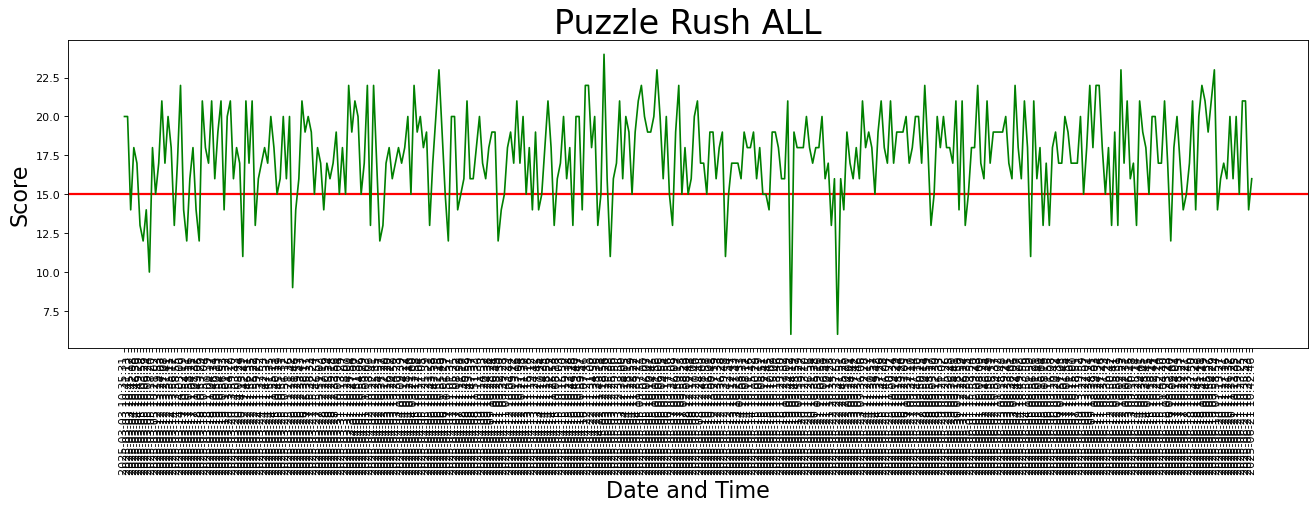

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20, 5), dpi=80) # fig size

date_time = all_puzzle_rush['Timestamp'].tolist()
score = all_puzzle_rush['Score'].tolist()

# cosmetics
plt.title(f"Puzzle Rush ALL", fontsize=30)
plt.xlabel("Date and Time", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.xticks(rotation=90)

# draws one red line on y = 15 
plt.axhline(linewidth=2, color='r', y=15)

# data for the plot
plt.plot(date_time, score, color = 'g', linestyle = 'solid')

# I want to add time and errorless attempts 

plt.savefig('data/pics/puzzle_rush_ALL.png', bbox_inches='tight')
plt.show() 

This plot is for time left. I want time left to be close to zero. 

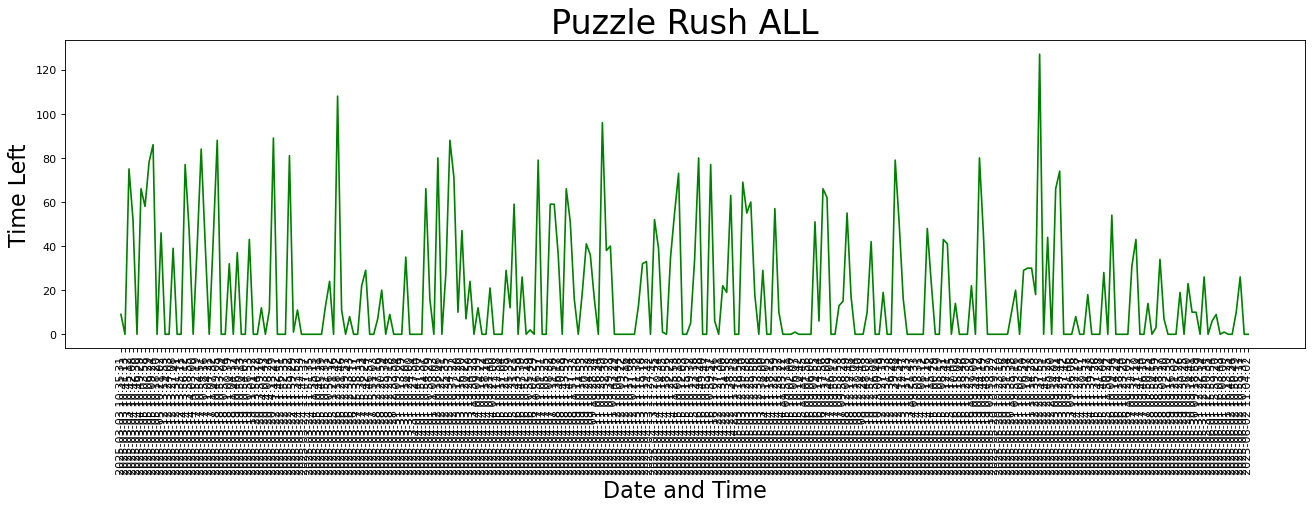

In [5]:
figure(figsize=(20, 5), dpi=80) # fig size

date_time = all_puzzle_rush['Timestamp'].tolist()
time_left = all_puzzle_rush['TimeLeft'].tolist()

# cosmetics
plt.title(f"Puzzle Rush ALL", fontsize=30)
plt.xlabel("Date and Time", fontsize=20)
plt.ylabel("Time Left", fontsize=20)
plt.xticks(rotation=90)

# data for the plot
plt.plot(date_time, time_left, color = 'g', linestyle = 'solid')

plt.show() 